In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
data = pd.read_csv('Results/cleaned_data.csv')

In [3]:
data.shape

(87396, 32)

In [4]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,14,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,14,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,14,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87391,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30
87392,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31
87393,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31
87394,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31


In [6]:
statistics = data.describe().T
statistics

,count,mean,std,min,25%,50%,75%,max
is_canceled,87396.0,0.274898,0.446466,0.00,0.0,0.0,1.0,1.0
lead_time,87396.0,79.891368,86.052325,0.00,11.0,49.0,125.0,737.0
arrival_date_year,87396.0,2016.210296,0.686102,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,87396.0,26.838334,13.674572,1.00,16.0,27.0,37.0,53.0
arrival_date_day_of_month,87396.0,15.815541,8.835146,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,87396.0,1.005263,1.031921,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,87396.0,2.625395,2.053584,0.00,1.0,2.0,4.0,50.0
adults,87396.0,1.875795,0.626500,0.00,2.0,2.0,2.0,55.0
children,87396.0,0.138633,0.455871,0.00,0.0,0.0,0.0,10.0
babies,87396.0,0.010824,0.113597,0.00,0.0,0.0,0.0,10.0


In [7]:
statistics.to_csv('Results/Statistics11.csv', index=False)


The correlation matrix is a matrix that shows the correlation between variables. It gives the correlation between all the possible pairs of values in a matrix format. This shows the relationship between one variable to the other. 
The matrix is a table in which every cell contains a correlation coefficient, where 1 is considered a strong relationship between variables, 0 a neutral relationship and -1 a not strong relationship

C:\Users\annla\AppData\Local\Temp\ipykernel_31776\361824812.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


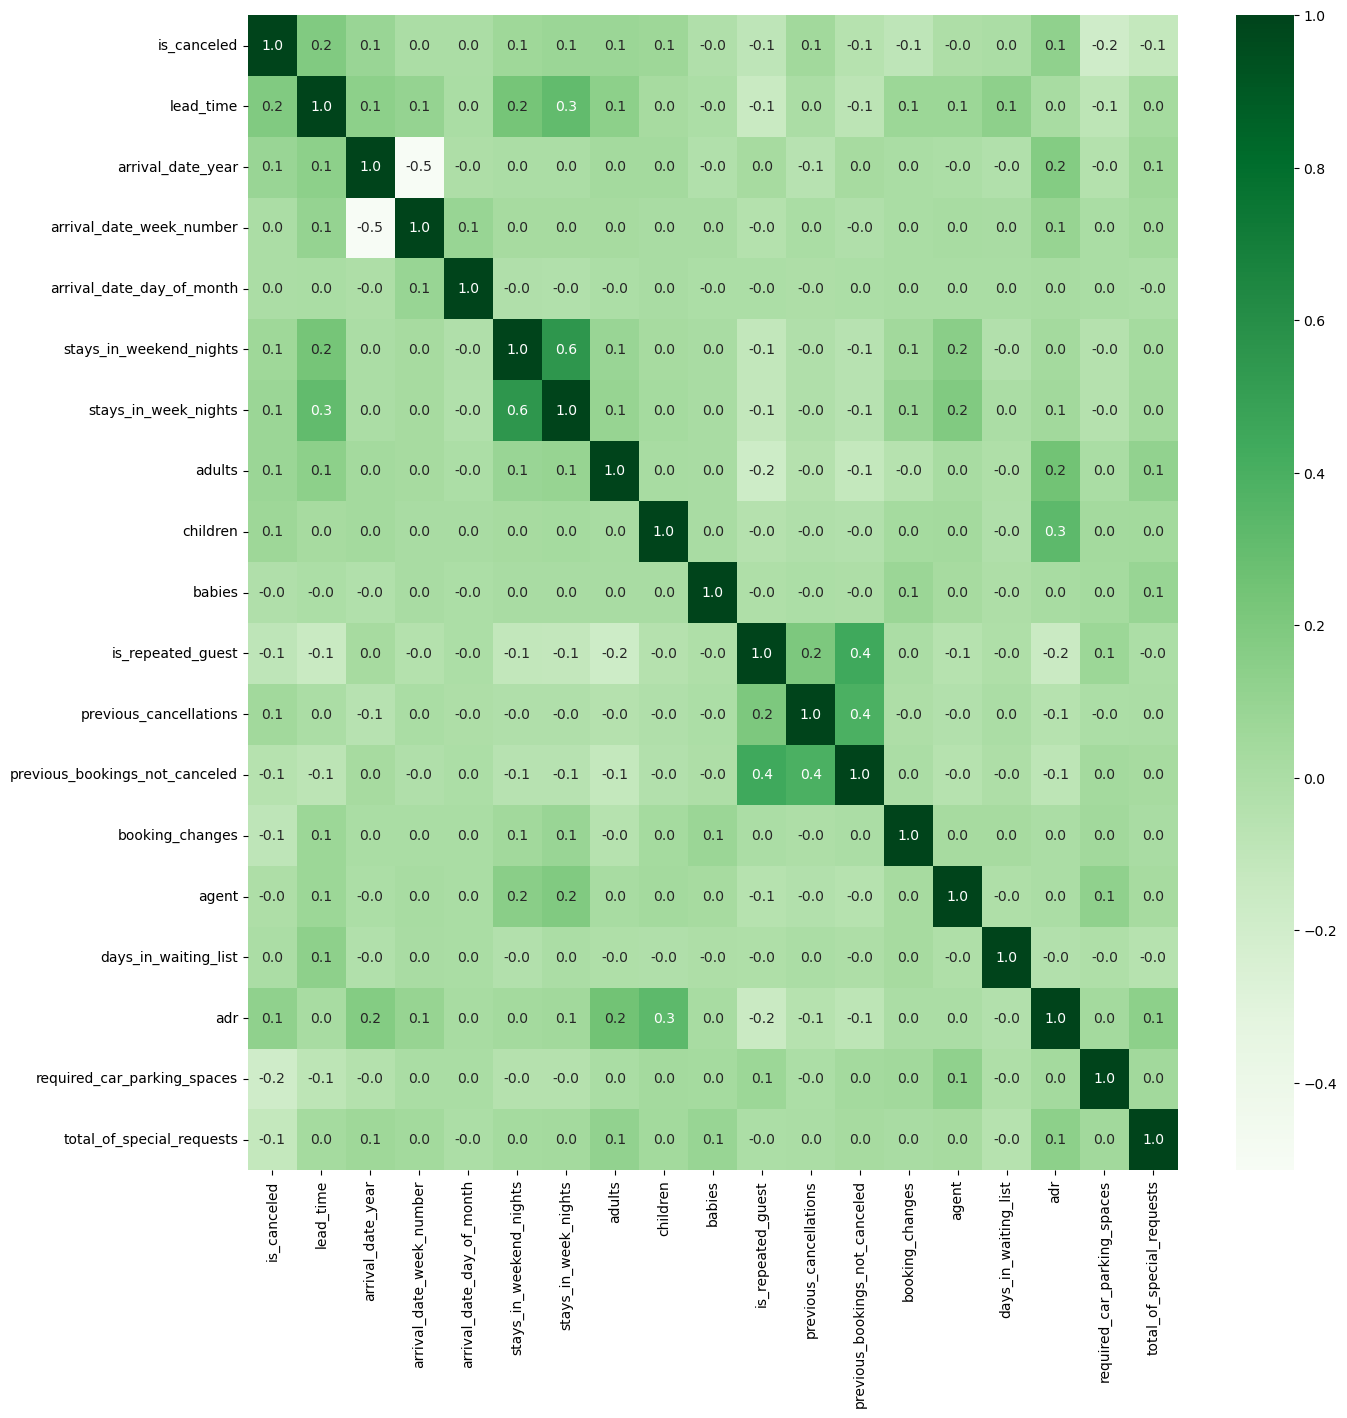

In [29]:
corr = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap="Greens",annot=True, fmt=".1f")
plt.savefig('Results/correlation.jpg')
plt.show()


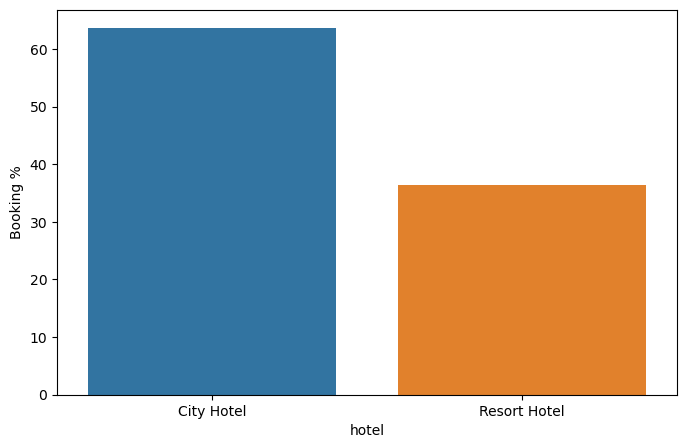

In [8]:
grouped_by_hotel = data.groupby('hotel')
data11 = pd.DataFrame((grouped_by_hotel.size()/data.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x = data11['hotel'], y = data11['Booking %'] )
plt.savefig('Results/Barplot2.pdf')
plt.show()

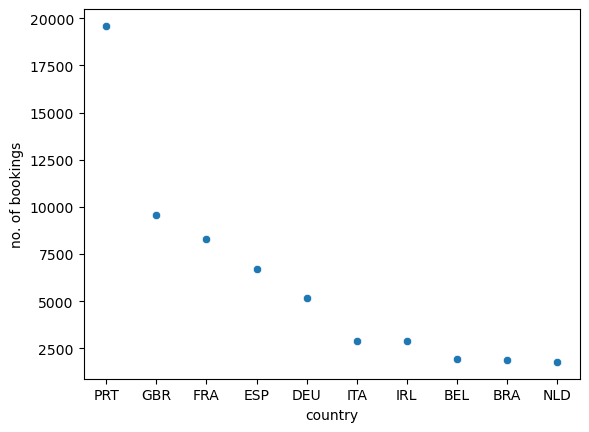

In [9]:
grp_by_country = data.groupby('country')
data2 = pd.DataFrame(grp_by_country.size()).rename(columns = {0:'no. of bookings'}).sort_values('no. of bookings', ascending = False)
data2 = data2[:10]
sns.scatterplot(x = data2.index, y = data2['no. of bookings'])
plt.savefig('Results/Scatterplot2.pdf')
plt.show()

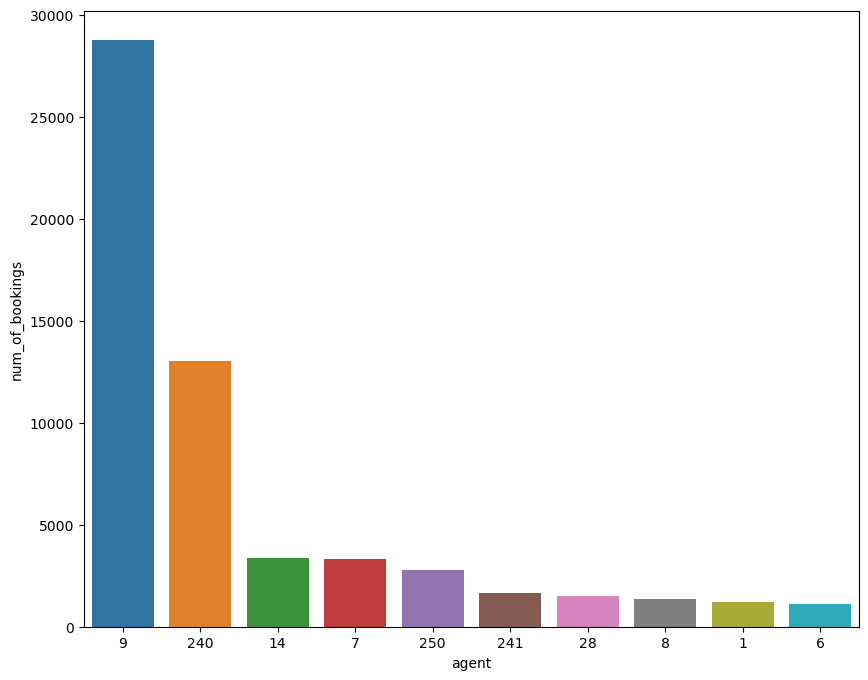

In [10]:
bar = pd.DataFrame(data['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}
                                                                   ).sort_values(by = 'num_of_bookings', ascending = False)
bar.drop(bar[bar['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
bar = bar[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,8))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = bar, order = bar.sort_values('num_of_bookings', ascending = False).agent)
plt.savefig('Results/barplot.pdf')

In [11]:
data["booking_changes"].value_counts()

0     62687
1      8565
2      2823
3       653
4       270
5        82
6        50
7        26
8        14
9         8
10        6
13        5
14        3
15        3
17        2
16        2
12        2
18        1
11        1
Name: booking_changes, dtype: int64

In [12]:
total_booking_changes = data['booking_changes'].count()
total_booking_changes

75203

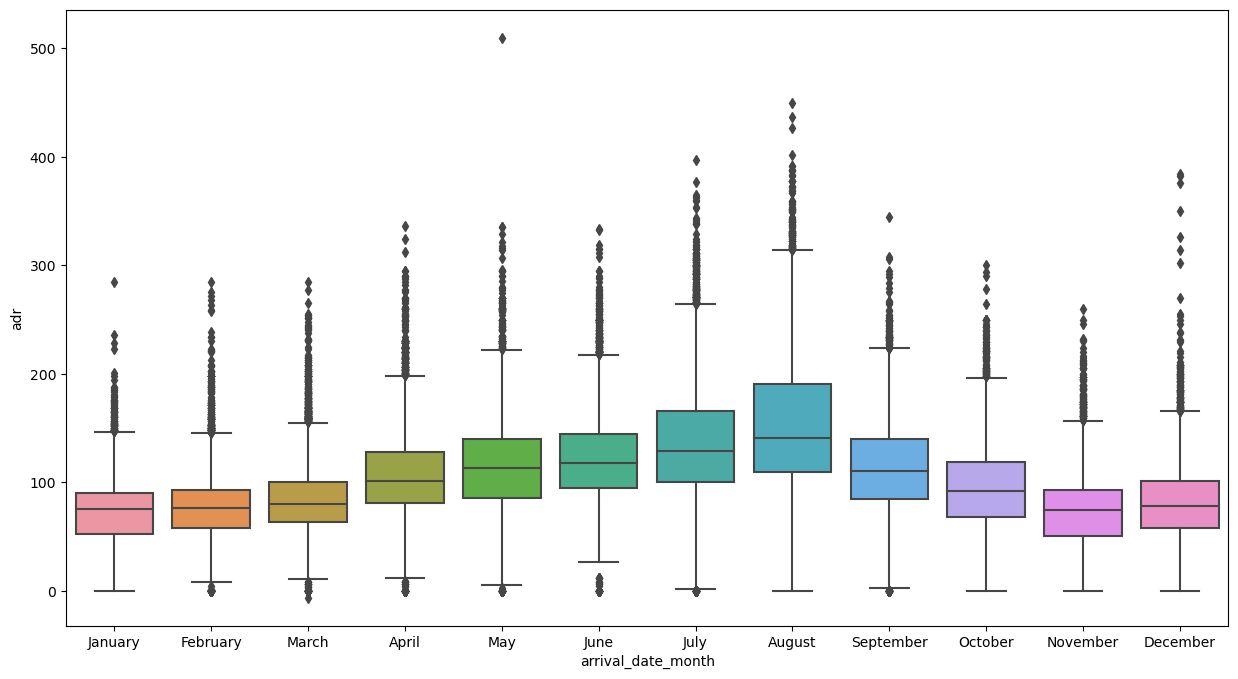

In [14]:
data.drop(data[data['adr'] > 5000].index, inplace = True)
months = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
data['arrival_date_month'] = pd.Categorical(data['arrival_date_month'],categories=months,ordered=True)
plt.figure(figsize = (15,8))
sns.boxplot(x = data['arrival_date_month'],y = data['adr'])
plt.savefig('Results/boxplot1.pdf')
plt.show()

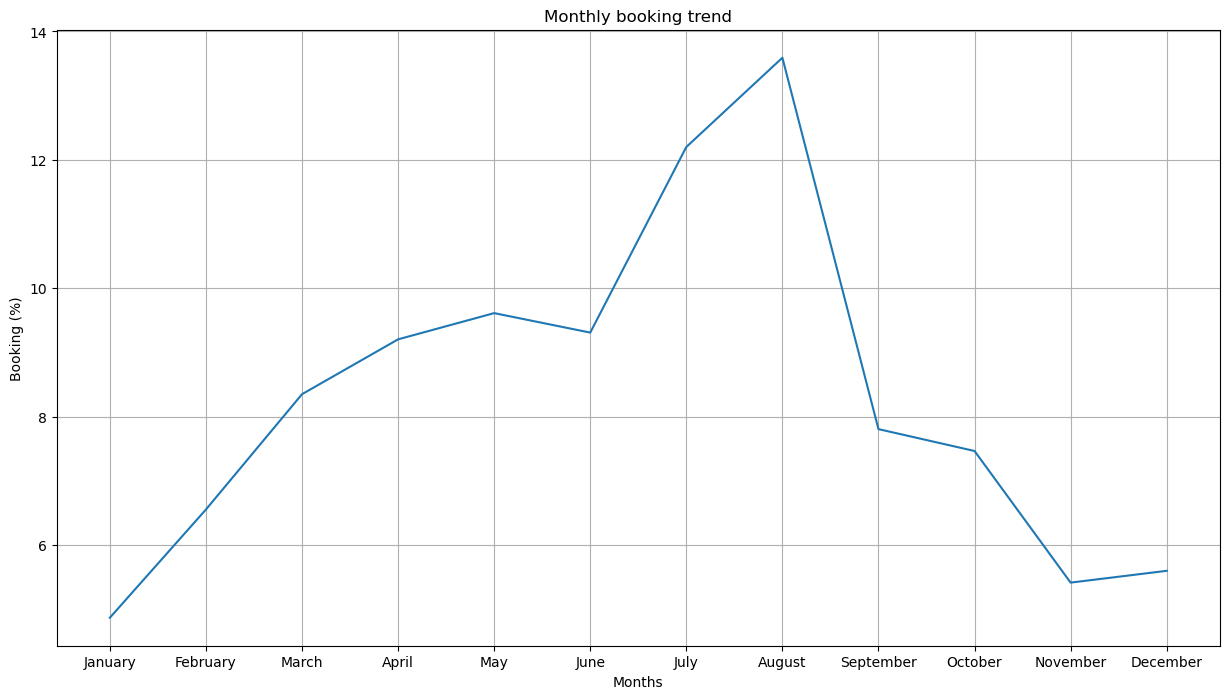

In [15]:
sorted_months = data.arrival_date_month.value_counts().reindex(months)
x = sorted_months.index
y = sorted_months/sorted_months.sum()*100
plt.figure(figsize=(15,8))
plt.xlabel('Months')
plt.ylabel('Booking (%)')
plt.title('Monthly booking trend')
plt.plot(x, y)
plt.grid()
plt.savefig('Results/lineplot.pdf')
plt.show()